In [3]:
from utils.tools import *

In [4]:
path=r"C:\Users\cjang\Desktop\\"
path2 = r"C:\Users\cjang\Desktop\impedance_data\data\\" 
data = ['DE_40_1_30.mpt']

In [5]:
adj_re = mpt_data(path, data)
re2 = mpt_data(path2, data)


In [6]:
adj_re.masker()

R2, fs2) = -0.999
    C(n2, fs2) =  0.935
    C(R2, n2)  = -0.917
    C(R, fs)   = -0.819
    C(R, n2)   =  0.819
    C(R, n)    = -0.748
    C(n, fs)   =  0.694
    C(R, fs2)  =  0.680
    C(R, R2)   = -0.658
    C(fs, n2)  = -0.641
    C(n, n2)   = -0.515
    C(fs, fs2) = -0.514
    C(Rs, n)   =  0.511
    C(fs, R2)  =  0.495
    C(Rs, R)   = -0.421
    C(n, fs2)  = -0.411
    C(n, R2)   =  0.396
    C(Rs, n2)  = -0.173
    C(Rs, fs)  =  0.161
    C(Rs, fs2) = -0.134
    C(Rs, R2)  =  0.128
None
ITERATION NO:  2
[33.489989827894945, 3000.111921772713, 0.8387032011402433, 22738.975963072535, 112856.48873225573, 0.7295315348543879, 0.9473460248295424]
total error:  -42.84613715766173
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 178
    # variables        = 7
    chi-square         = 206.337612
    reduced chi-square = 1.20665270
    Akaike info crit   = 40.2959705
    Bayesian info crit = 62.5684553
[[Variables]]
    Rs:   33.4

(1000018.6000000008, 39.80892199999999)

No handles with labels found to put in legend.


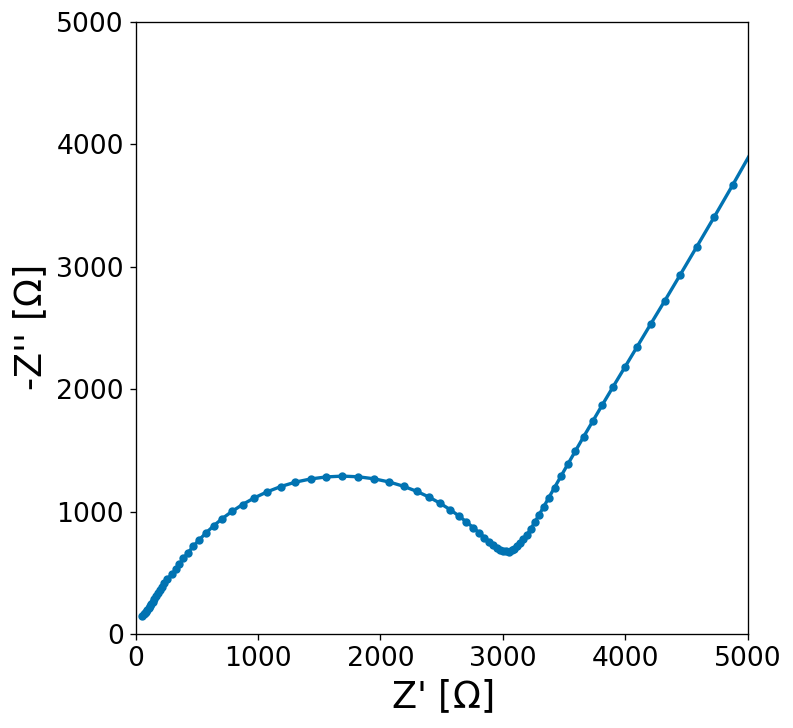

In [7]:
adj_re.set_new_gph_dims(15,15)
adj_re.mpt_plot(x_window = [0,5000], y_window = [0,5000])

No handles with labels found to put in legend.


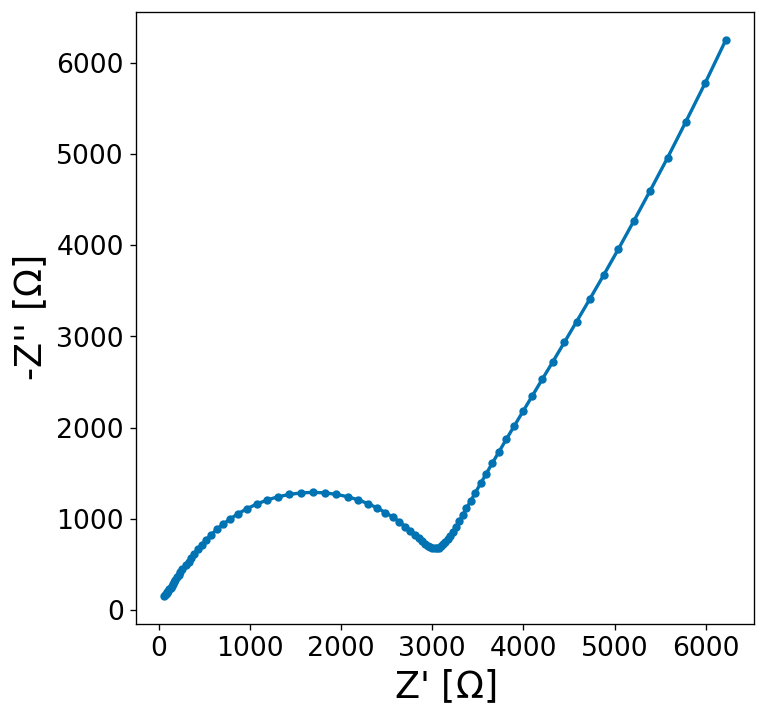

In [8]:
adj_re = mpt_data(path, data, mask = [1000018.6000000008, 39.80892199999999])
adj_re.set_new_gph_dims(15,15)
adj_re.mpt_plot()

In [9]:
Rs_guess = 40

R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2

adj_re.guesser(Rs_guess,R_guess,n_guess,fs_guess,R2_guess,n2_guess,fs2_guess)

R2, fs2) = -0.999
    C(n2, fs2) =  0.935
    C(R2, n2)  = -0.917
    C(R, fs)   = -0.819
    C(R, n2)   =  0.819
    C(R, n)    = -0.748
    C(n, fs)   =  0.694
    C(R, fs2)  =  0.680
    C(R, R2)   = -0.658
    C(fs, n2)  = -0.641
    C(n, n2)   = -0.515
    C(fs, fs2) = -0.514
    C(Rs, n)   =  0.511
    C(fs, R2)  =  0.495
    C(Rs, R)   = -0.421
    C(n, fs2)  = -0.411
    C(n, R2)   =  0.396
    C(Rs, n2)  = -0.173
    C(Rs, fs)  =  0.161
    C(Rs, fs2) = -0.134
    C(Rs, R2)  =  0.128
None
ITERATION NO:  2
[33.489989827894945, 3000.111921772713, 0.8387032011402433, 22738.975963072535, 112856.48873225573, 0.7295315348543879, 0.9473460248295424]
total error:  -42.84613715766173
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 178
    # variables        = 7
    chi-square         = 206.337612
    reduced chi-square = 1.20665270
    Akaike info crit   = 40.2959705
    Bayesian info crit = 62.5684553
[[Variables]]
    Rs:   33.4

[33.489488674007156,
 3000.1264502872973,
 0.8387011469573208,
 22738.79172943603,
 112840.63536435792,
 0.7295372890618985,
 0.9475617098874135]

No handles with labels found to put in legend.


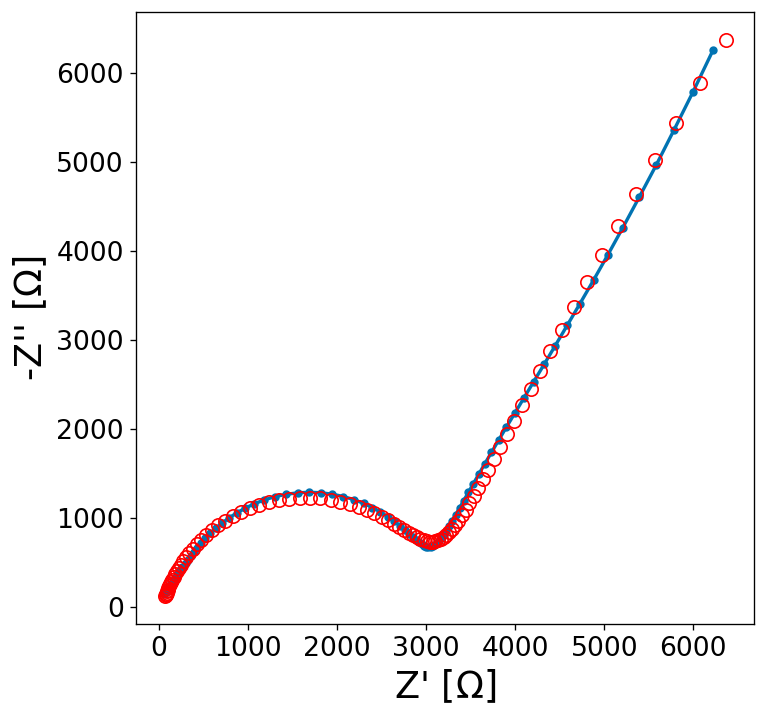

In [10]:
adj_re.mpt_plot(fitting = 'on')

In [11]:
"""
print('cycle || No. RC-elements ||   u')
adj_re.decade = []
adj_re.Rparam = []
adj_re.t_const = []
adj_re.Lin_KK_Fit = []
adj_re.R_names = []
adj_re.KK_R0 = []
adj_re.KK_R = []
adj_re.number_RC = []
adj_re.number_RC_sort = []

adj_re.KK_u = []
adj_re.KK_Rgreater = []
adj_re.KK_Rminor = []
M = 2
for i in range(len(adj_re.df)):
    adj_re.decade.append(np.log10(np.max(adj_re.df[i].f))-np.log10(np.min(adj_re.df[i].f))) #determine the number of RC circuits based on the number of decades measured and num_RC
    adj_re.number_RC.append(M)
    adj_re.number_RC_sort.append(M) #needed for adj_re.KK_R
    adj_re.Rparam.append(KK_Rnam_val(re=adj_re.df[i].re, re_start=adj_re.df[i].re.idxmin(), num_RC=int(adj_re.number_RC[i]))[0]) #Creates intial guesses for R's
    adj_re.t_const.append(KK_timeconst(w=adj_re.df[i].w, num_RC=int(adj_re.number_RC[i]))) #Creates time constants values for adj_re.number_RC -(RC)- circuits
    
    adj_re.Lin_KK_Fit.append(minimize(KK_errorfunc, adj_re.Rparam[i], method='leastsq', args=(adj_re.df[i].w.values, adj_re.df[i].re.values, adj_re.df[i].im.values, adj_re.number_RC[i], weight_func, adj_re.t_const[i]) )) #maxfev=99
    adj_re.R_names.append(KK_Rnam_val(re=adj_re.df[i].re, re_start=adj_re.df[i].re.idxmin(), num_RC=int(adj_re.number_RC[i]))[1]) #creates R names
    for j in range(len(adj_re.R_names[i])):
        adj_re.KK_R0.append(adj_re.Lin_KK_Fit[i].params.get(adj_re.R_names[i][j]).value)
adj_re.number_RC_sort.insert(0,0) #needed for adj_re.KK_R
for i in range(len(adj_re.df)):
    adj_re.KK_R.append(adj_re.KK_R0[int(np.cumsum(adj_re.number_RC_sort)[i]):int(np.cumsum(adj_re.number_RC_sort)[i+1])]) #assigns resistances from each spectra to their respective df
    adj_re.KK_Rgreater.append(np.where(np.array(adj_re.KK_R)[i] >= 0, np.array(adj_re.KK_R)[i], 0) )
    adj_re.KK_Rminor.append(np.where(np.array(adj_re.KK_R)[i] < 0, np.array(adj_re.KK_R)[i], 0) )
    adj_re.KK_u.append(1-(np.abs(np.sum(adj_re.KK_Rminor[i]))/np.abs(np.sum(adj_re.KK_Rgreater[i]))))

for i in range(len(adj_re.df)):
    while adj_re.KK_u[i] <= 0.75 or adj_re.KK_u[i] >= 0.88:
        adj_re.number_RC_sort0 = []
        adj_re.KK_R_lim = []
        adj_re.number_RC[i] = adj_re.number_RC[i] + 1
        adj_re.number_RC_sort0.append(adj_re.number_RC)
        adj_re.number_RC_sort = np.insert(adj_re.number_RC_sort0, 0,0)
        adj_re.Rparam[i] = KK_Rnam_val(re=adj_re.df[i].re, re_start=adj_re.df[i].re.idxmin(), num_RC=int(adj_re.number_RC[i]))[0] #Creates intial guesses for R's
        adj_re.t_const[i] = KK_timeconst(w=adj_re.df[i].w, num_RC=int(adj_re.number_RC[i])) #Creates time constants values for adj_re.number_RC -(RC)- circuits
        adj_re.Lin_KK_Fit[i] = minimize(KK_errorfunc, adj_re.Rparam[i], method='leastsq', args=(adj_re.df[i].w.values, adj_re.df[i].re.values, adj_re.df[i].im.values, adj_re.number_RC[i], weight_func, adj_re.t_const[i]) ) #maxfev=99
        adj_re.R_names[i] = KK_Rnam_val(re=adj_re.df[i].re, re_start=adj_re.df[i].re.idxmin(), num_RC=int(adj_re.number_RC[i]))[1] #creates R names
        adj_re.KK_R0 = np.delete(np.array(adj_re.KK_R0), np.s_[0:len(adj_re.KK_R0)])
        adj_re.KK_R0 = []
        for q in range(len(adj_re.df)):
            for j in range(len(adj_re.R_names[q])):
                adj_re.KK_R0.append(adj_re.Lin_KK_Fit[q].params.get(adj_re.R_names[q][j]).value)
        adj_re.KK_R_lim = np.cumsum(adj_re.number_RC_sort) #used for KK_R[i]

        adj_re.KK_R[i] = adj_re.KK_R0[adj_re.KK_R_lim[i]:adj_re.KK_R_lim[i+1]] #assigns resistances from each spectra to their respective df
        adj_re.KK_Rgreater[i] = np.where(np.array(adj_re.KK_R[i]) >= 0, np.array(adj_re.KK_R[i]), 0)
        adj_re.KK_Rminor[i] = np.where(np.array(adj_re.KK_R[i]) < 0, np.array(adj_re.KK_R[i]), 0)
        adj_re.KK_u[i] = 1-(np.abs(np.sum(adj_re.KK_Rminor[i]))/np.abs(np.sum(adj_re.KK_Rgreater[i])))
    else:
        print('['+str(i+1)+']'+'            '+str(adj_re.number_RC[i]),'           '+str(np.round(adj_re.KK_u[i],2)))

adj_re.KK_circuit_fit = []
adj_re.KK_rr_re = []
adj_re.KK_rr_im = []
functs = []
for i in range(2,81):
    functs.append('KK_RC'+str(i))

for i in range(len(adj_re.df)):
    cir_num = int(adj_re.number_RC[i])
    cir_funct = eval(functs[cir_num - 2])
    adj_re.KK_circuit_fit.append(cir_funct(w=adj_re.df[0].w, Rs=adj_re.Lin_KK_Fit[0].params.get('Rs').value, R_values=adj_re.KK_R[0], t_values=adj_re.t_const[0]))
    if cir_num >= 81:
        print('RC simulation circuit not defined')
        print('   Number of RC = ', adj_re.number_RC)
    adj_re.KK_rr_re.append(residual_real(re=adj_re.df[i].re, fit_re=adj_re.KK_circuit_fit[i].real, fit_im=-adj_re.KK_circuit_fit[i].imag)) #relative residuals for the real part
    adj_re.KK_rr_im.append(residual_imag(im=adj_re.df[i].im, fit_re=adj_re.KK_circuit_fit[i].real, fit_im=-adj_re.KK_circuit_fit[i].imag)) #relative residuals for the imag part
"""

"\nprint('cycle || No. RC-elements ||   u')\nadj_re.decade = []\nadj_re.Rparam = []\nadj_re.t_const = []\nadj_re.Lin_KK_Fit = []\nadj_re.R_names = []\nadj_re.KK_R0 = []\nadj_re.KK_R = []\nadj_re.number_RC = []\nadj_re.number_RC_sort = []\n\nadj_re.KK_u = []\nadj_re.KK_Rgreater = []\nadj_re.KK_Rminor = []\nM = 2\nfor i in range(len(adj_re.df)):\n    adj_re.decade.append(np.log10(np.max(adj_re.df[i].f))-np.log10(np.min(adj_re.df[i].f))) #determine the number of RC circuits based on the number of decades measured and num_RC\n    adj_re.number_RC.append(M)\n    adj_re.number_RC_sort.append(M) #needed for adj_re.KK_R\n    adj_re.Rparam.append(KK_Rnam_val(re=adj_re.df[i].re, re_start=adj_re.df[i].re.idxmin(), num_RC=int(adj_re.number_RC[i]))[0]) #Creates intial guesses for R's\n    adj_re.t_const.append(KK_timeconst(w=adj_re.df[i].w, num_RC=int(adj_re.number_RC[i]))) #Creates time constants values for adj_re.number_RC -(RC)- circuits\n    \n    adj_re.Lin_KK_Fit.append(minimize(KK_errorfunc,

In [12]:
"""fig = figure(figsize=(6, 8), dpi=120, facecolor='w', edgecolor='k')
fig.subplots_adjust(left=0.1, right=0.95, hspace=0.5, bottom=0.1, top=0.95)
#ax = fig.add_subplot(311, aspect='equal')
#ax1 = fig.add_subplot(312)
ax2 = fig.add_subplot(313)


colors = sns.color_palette("colorblind", n_colors=len(adj_re.df))
colors_real = sns.color_palette("Blues", n_colors=len(adj_re.df)+2)
colors_imag = sns.color_palette("Oranges", n_colors=len(adj_re.df)+2)

i = 0

ax2.plot(np.log10(adj_re.df[i].f), adj_re.KK_rr_re[i]*100, color=colors_real[i+1], marker='D', ls='--', ms=6, alpha=.7, label=adj_re.label_re_1[i])
ax2.plot(np.log10(adj_re.df[i].f), adj_re.KK_rr_im[i]*100, color=colors_imag[i+1], marker='s', ls='--', ms=6, alpha=.7, label=adj_re.label_im_1[i])"""

'fig = figure(figsize=(6, 8), dpi=120, facecolor=\'w\', edgecolor=\'k\')\nfig.subplots_adjust(left=0.1, right=0.95, hspace=0.5, bottom=0.1, top=0.95)\n#ax = fig.add_subplot(311, aspect=\'equal\')\n#ax1 = fig.add_subplot(312)\nax2 = fig.add_subplot(313)\n\n\ncolors = sns.color_palette("colorblind", n_colors=len(adj_re.df))\ncolors_real = sns.color_palette("Blues", n_colors=len(adj_re.df)+2)\ncolors_imag = sns.color_palette("Oranges", n_colors=len(adj_re.df)+2)\n\ni = 0\n\nax2.plot(np.log10(adj_re.df[i].f), adj_re.KK_rr_re[i]*100, color=colors_real[i+1], marker=\'D\', ls=\'--\', ms=6, alpha=.7, label=adj_re.label_re_1[i])\nax2.plot(np.log10(adj_re.df[i].f), adj_re.KK_rr_im[i]*100, color=colors_imag[i+1], marker=\'s\', ls=\'--\', ms=6, alpha=.7, label=adj_re.label_im_1[i])'

In [13]:
#kk_df = pd.DataFrame({'f':np.log10(adj_re.df[0].f), 're':adj_re.KK_rr_re[0]*100, 'im':adj_re.KK_rr_im[0]*100})

In [14]:
#adj_re.KK_rr_re[0]*100

In [15]:
#adj_re.mpt_plot()

In [16]:
"""#DIFFERENCE BETWEEN REAL AND IMAGINARY VALUES
kk_df['difference'] = abs(kk_df['re'] - kk_df['im'])

#TAKE THE MEAN AND USE IT AS A MASK
diff_mean = kk_df['difference'].mean()

#IF THE MASK IS NOT SATISFACTORY, TAKE A FRACTION OF THE MEAN AND USE THAT AS A CUTOFF LINE
masked_df = kk_df[kk_df['difference'] < diff_mean * 0.5]
#TAKE THE LOWEST AND HIGHEST FREQUENCIES FROM THAT GRAPH AND USE IT AS A MASK
re2 = mpt_data(path, data, mask = [10**masked_df['f'].max(),10**masked_df['f'].min()])
re2.set_new_gph_dims(15,15)
re2.mpt_plot(x_window = [0,5000], y_window = [0,5000])"""

"#DIFFERENCE BETWEEN REAL AND IMAGINARY VALUES\nkk_df['difference'] = abs(kk_df['re'] - kk_df['im'])\n\n#TAKE THE MEAN AND USE IT AS A MASK\ndiff_mean = kk_df['difference'].mean()\n\n#IF THE MASK IS NOT SATISFACTORY, TAKE A FRACTION OF THE MEAN AND USE THAT AS A CUTOFF LINE\nmasked_df = kk_df[kk_df['difference'] < diff_mean * 0.5]\n#TAKE THE LOWEST AND HIGHEST FREQUENCIES FROM THAT GRAPH AND USE IT AS A MASK\nre2 = mpt_data(path, data, mask = [10**masked_df['f'].max(),10**masked_df['f'].min()])\nre2.set_new_gph_dims(15,15)\nre2.mpt_plot(x_window = [0,5000], y_window = [0,5000])"

In [17]:
"""
#DEPRECATED
def automated_masker(kk_df):
    kk_df['difference'] = abs(kk_df['re'] - kk_df['im'])
    diff_mean = kk_df['difference'].mean()
    masked_df = kk_df[kk_df['difference'] < diff_mean]
    print('MASK BOUNDARIES: ', 10**masked_df['f'].max(),10**masked_df['f'].min())
    re2 = mpt_data(path, data, mask = [10**masked_df['f'].max(),10**masked_df['f'].min()])
    re2.set_new_gph_dims(15,15)
    re2.mpt_plot(x_window = [0,5000], y_window = [0,5000])


    Rs_guess = 40

    R_guess = 2959
    n_guess = 0.8
    fs_guess = 23023

    R2_guess = 258738
    n2_guess = 0.8
    fs2_guess = 0.2
    fit_guess = re2.guesser(Rs_guess,R_guess,n_guess,fs_guess,R2_guess,n2_guess,fs2_guess)
    if re2.counter >= 950 or abs(re2.error_total) > 1e-10:
        return manual_masker(kk_df, diff_mean * .9)
    re2.mpt_plot(fitting = 'on',rr = 'on')
    return (10**masked_df['f'].max(),10**masked_df['f'].min())"""

"\n#DEPRECATED\ndef automated_masker(kk_df):\n    kk_df['difference'] = abs(kk_df['re'] - kk_df['im'])\n    diff_mean = kk_df['difference'].mean()\n    masked_df = kk_df[kk_df['difference'] < diff_mean]\n    print('MASK BOUNDARIES: ', 10**masked_df['f'].max(),10**masked_df['f'].min())\n    re2 = mpt_data(path, data, mask = [10**masked_df['f'].max(),10**masked_df['f'].min()])\n    re2.set_new_gph_dims(15,15)\n    re2.mpt_plot(x_window = [0,5000], y_window = [0,5000])\n\n\n    Rs_guess = 40\n\n    R_guess = 2959\n    n_guess = 0.8\n    fs_guess = 23023\n\n    R2_guess = 258738\n    n2_guess = 0.8\n    fs2_guess = 0.2\n    fit_guess = re2.guesser(Rs_guess,R_guess,n_guess,fs_guess,R2_guess,n2_guess,fs2_guess)\n    if re2.counter >= 950 or abs(re2.error_total) > 1e-10:\n        return manual_masker(kk_df, diff_mean * .9)\n    re2.mpt_plot(fitting = 'on',rr = 'on')\n    return (10**masked_df['f'].max(),10**masked_df['f'].min())"

In [18]:
"""
def masker(kk_df,number = 1):
    kk_df['difference'] = abs(kk_df['re'] - kk_df['im'])
    diff_mean = kk_df['difference'].mean()
    masked_df = kk_df[kk_df['difference'] < diff_mean * number]
    print('MASK BOUNDARIES: ', 10**masked_df['f'].max(),10**masked_df['f'].min())
    re2 = mpt_data(path, data, mask = [10**masked_df['f'].max(),10**masked_df['f'].min()])
    re2.set_new_gph_dims(15,15)
    re2.mpt_plot(x_window = [0,5000], y_window = [0,5000])


    Rs_guess = 40

    R_guess = 2959
    n_guess = 0.8
    fs_guess = 23023

    R2_guess = 258738
    n2_guess = 0.8
    fs2_guess = 0.2
    fit_guess = re2.guesser(Rs_guess,R_guess,n_guess,fs_guess,R2_guess,n2_guess,fs2_guess)
    if re2.counter >= 950 or abs(re2.error_total) > 1e-10:
        return masker(kk_df, number * .9)
    re2.mpt_plot(fitting = 'on',rr = 'on')
    return (10**masked_df['f'].max(),10**masked_df['f'].min())"""

"\ndef masker(kk_df,number = 1):\n    kk_df['difference'] = abs(kk_df['re'] - kk_df['im'])\n    diff_mean = kk_df['difference'].mean()\n    masked_df = kk_df[kk_df['difference'] < diff_mean * number]\n    print('MASK BOUNDARIES: ', 10**masked_df['f'].max(),10**masked_df['f'].min())\n    re2 = mpt_data(path, data, mask = [10**masked_df['f'].max(),10**masked_df['f'].min()])\n    re2.set_new_gph_dims(15,15)\n    re2.mpt_plot(x_window = [0,5000], y_window = [0,5000])\n\n\n    Rs_guess = 40\n\n    R_guess = 2959\n    n_guess = 0.8\n    fs_guess = 23023\n\n    R2_guess = 258738\n    n2_guess = 0.8\n    fs2_guess = 0.2\n    fit_guess = re2.guesser(Rs_guess,R_guess,n_guess,fs_guess,R2_guess,n2_guess,fs2_guess)\n    if re2.counter >= 950 or abs(re2.error_total) > 1e-10:\n        return masker(kk_df, number * .9)\n    re2.mpt_plot(fitting = 'on',rr = 'on')\n    return (10**masked_df['f'].max(),10**masked_df['f'].min())"